In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/labeled_data.csv")

In [3]:
data = df.drop(columns=["_id", "TimeStamp","PART_FACT_PLAN_DATE", "PART_FACT_SERIAL",
                        "EQUIP_NAME", "EQUIP_CD",
                        "Mold_Temperature_1","Mold_Temperature_2","Mold_Temperature_5","Mold_Temperature_6",
                        "Mold_Temperature_7","Mold_Temperature_8","Mold_Temperature_9","Mold_Temperature_10",
                        "Mold_Temperature_11","Mold_Temperature_12","Barrel_Temperature_7","Switch_Over_Position"])

In [4]:
cn7 = data[(data["PART_NAME"] == "CN7 W/S SIDE MLD'G RH") | (data["PART_NAME"] == "CN7 W/S SIDE MLD'G LH")]

In [5]:
cn7 = cn7.drop(columns=["PART_NAME"])

In [6]:
cn7 =cn7.replace("Y", 100).replace("N", 0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18848\4245944347.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cn7 =cn7.replace("Y", 100).replace("N", 0)


In [7]:
cn7_Y = cn7[cn7["PassOrFail"]==100].copy()
print("CN7의 양품 개수:", len(cn7_Y))
cn7_N = cn7[cn7["PassOrFail"]==0].copy()
print("CN7의 불량 개수:", len(cn7_N))

CN7의 양품 개수: 6697
CN7의 불량 개수: 39


In [8]:
def remove_outliers(df, column):
    # 1사분위수(Q1)와 3사분위수(Q3) 계산
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # IQR 계산
    IQR = Q3 - Q1
    
    # 이상치 범위 설정
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 제거
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df

In [9]:
cn7_Y = remove_outliers(cn7_Y, "Injection_Time")
cn7_Y = remove_outliers(cn7_Y, "Plasticizing_Time")
cn7_Y = remove_outliers(cn7_Y, "Cycle_Time")
cn7_Y = remove_outliers(cn7_Y, "Max_Injection_Speed")
cn7_Y = remove_outliers(cn7_Y, "Mold_Temperature_3")

In [10]:
cn7 = pd.concat([cn7_Y, cn7_N], ignore_index=True)

In [11]:
cn7_copy = cn7.copy()
cn7 = cn7.drop(columns=["Reason"])

In [12]:
import matplotlib.pyplot as plt

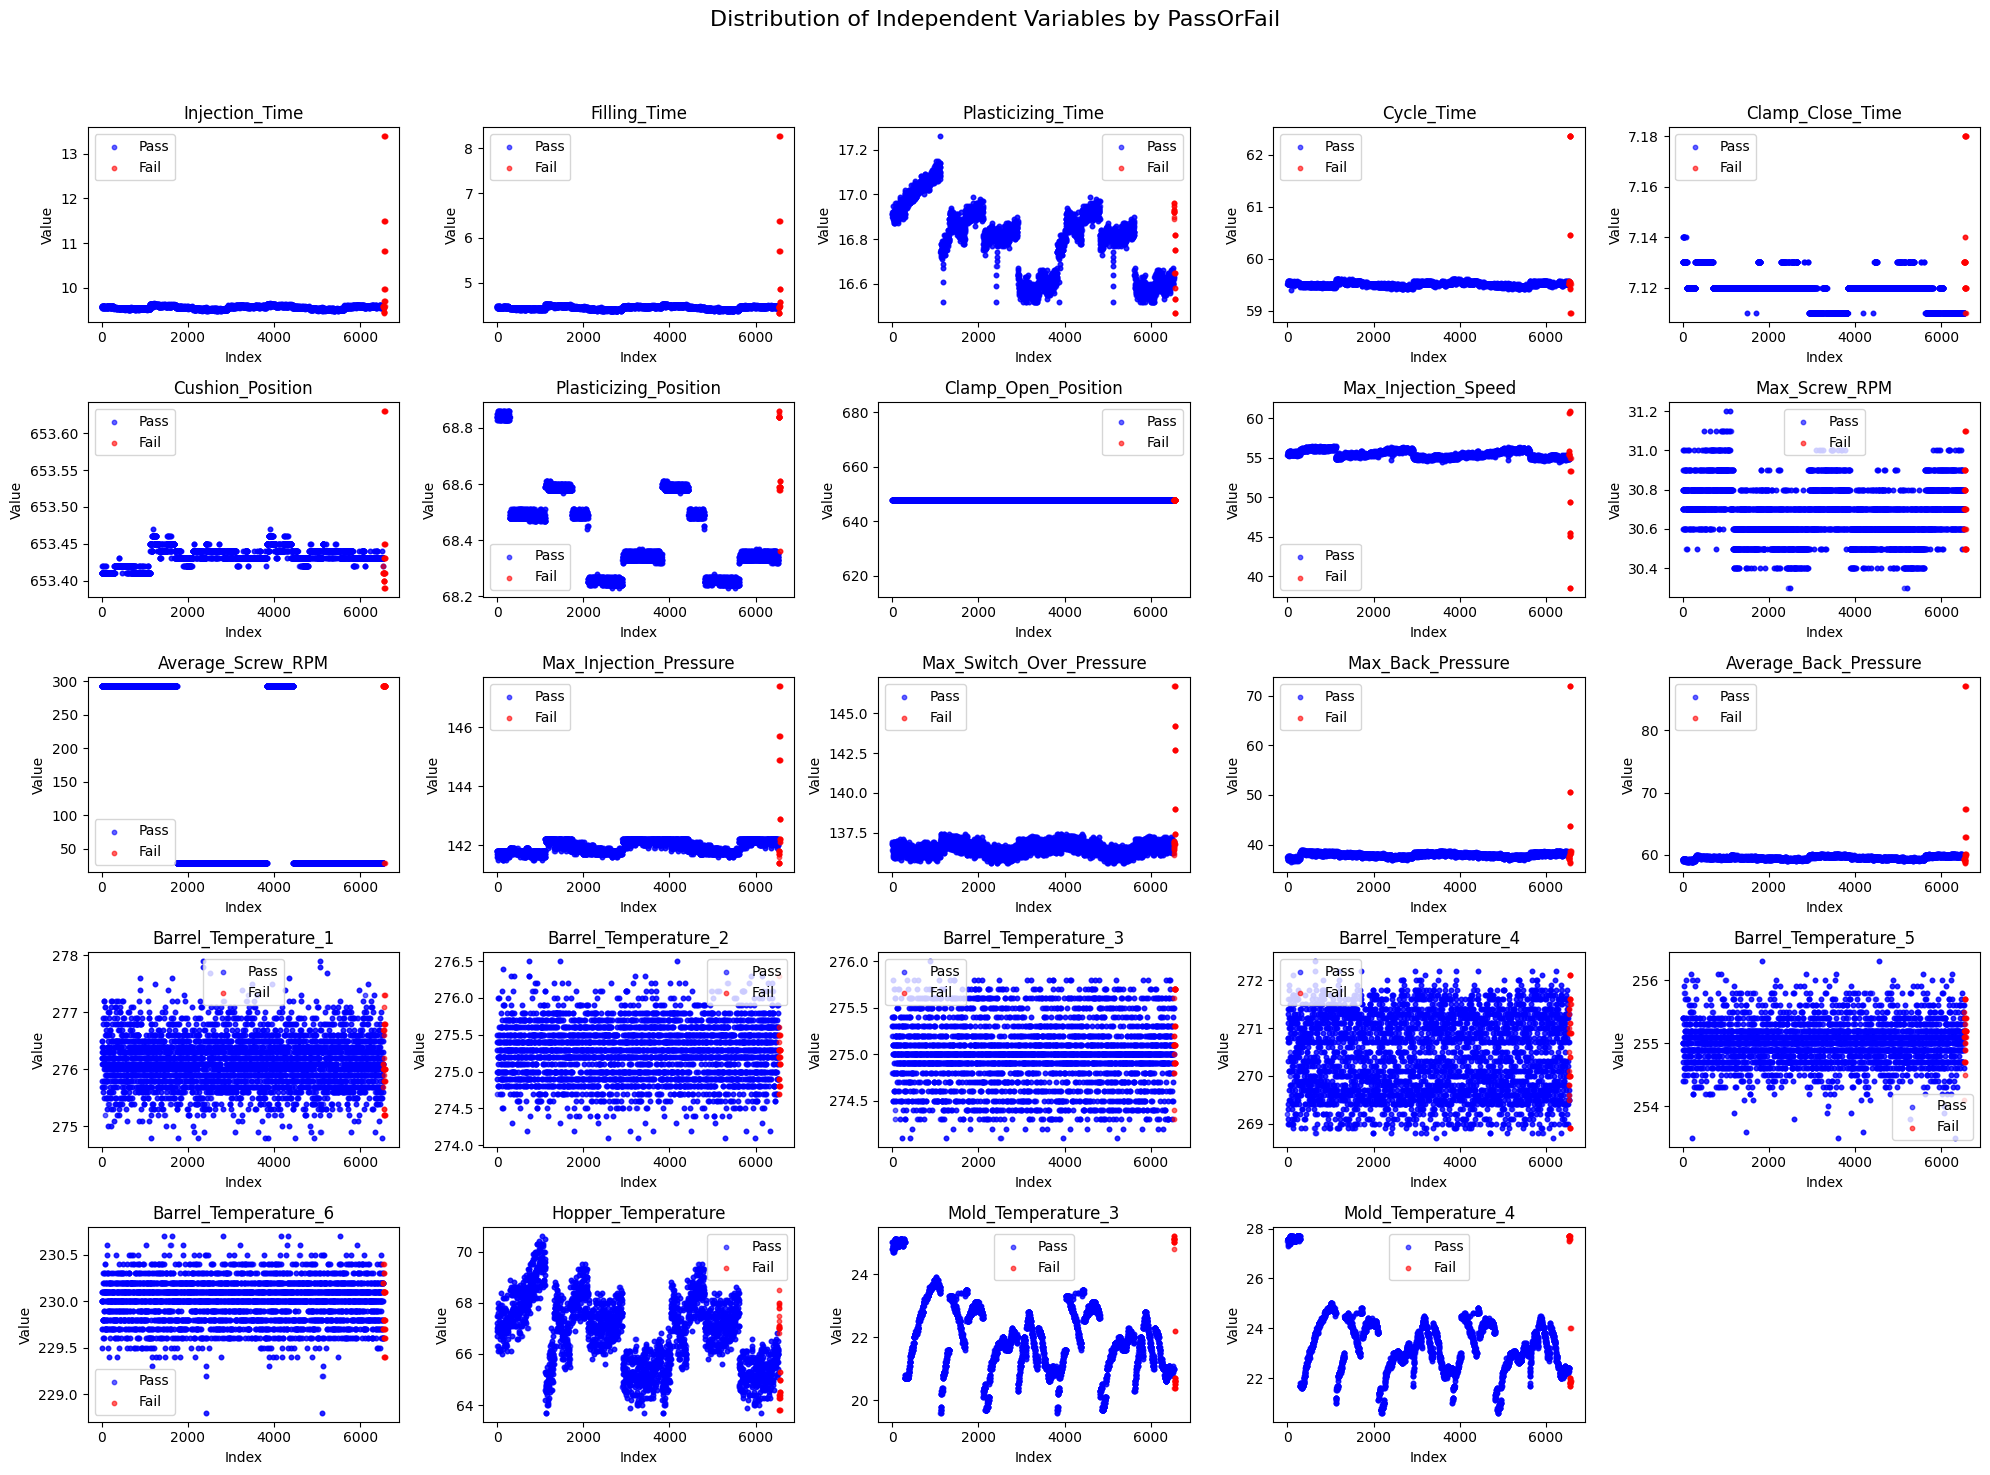

In [13]:

# 독립 변수와 종속 변수 분
y = cn7["PassOrFail"]
X = cn7.drop(columns=["PassOrFail"])

# 그래프 설정
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
axes = axes.flatten()
fig.suptitle("Distribution of Independent Variables by PassOrFail", fontsize=16)

# 독립 변수별 산점도 생성
for i, column in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(X.index[y == 100], X[column][y == 100], label="Pass", color="blue", alpha=0.6, s=10)
    ax.scatter(X.index[y == 0], X[column][y == 0], label="Fail", color="red", alpha=0.6, s=10)
    ax.set_title(column)
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.legend()

# 빈 그래프 제거
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [14]:
cn7

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,100,9.59,4.47,16.920000,59.520000,7.13,653.409973,68.849998,647.98999,55.400002,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.5
1,100,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2,100,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
3,100,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
4,100,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6568,0,9.98,4.87,16.530001,60.459999,7.12,653.409973,68.610001,647.98999,49.400002,...,67.400002,276.000000,275.299988,275.100006,271.600006,255.199997,229.600006,65.000000,20.700001,22.0
6569,0,9.98,4.87,16.530001,60.459999,7.12,653.409973,68.610001,647.98999,49.400002,...,67.400002,276.000000,275.299988,275.100006,271.600006,255.199997,229.600006,65.000000,20.700001,22.0
6570,0,9.70,4.58,16.469999,58.959999,7.12,653.450012,68.589996,647.98999,53.299999,...,60.200001,276.799988,275.100006,275.700012,270.899994,255.399994,229.399994,64.500000,20.600000,21.9
6571,0,9.70,4.58,16.469999,58.959999,7.12,653.450012,68.589996,647.98999,53.299999,...,60.200001,276.799988,275.100006,275.700012,270.899994,255.399994,229.399994,64.500000,20.600000,21.9


In [15]:
from sklearn.model_selection import train_test_split
X = cn7.drop(columns=["PassOrFail"])
y = cn7["PassOrFail"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4601, 24), (1972, 24), (4601,), (1972,))

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.3, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_val_scaled = ss.transform(X_val)
X_test_scaled = ss.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)
val_pred = model.predict(X_val_scaled)
r2 = r2_score(y_val, val_pred)
mae = mean_absolute_error(y_val, val_pred)
mse = mean_squared_error(y_val, val_pred)
print(mae, mse, r2)


# 각 독립변수의 계수와 절편 확인
print("회귀계수:", model.coef_)    # 각 독립변수에 대한 계수 출력
print("절편:", model.intercept_)   # 상수항(절편) 출력

2.9158239166387636 363.8564075145791 -3.2240854030430475
회귀계수: [-7.81434500e+00 -7.66255907e+00  4.29880155e+00  6.27668971e+00
 -1.08499606e+00 -2.78613887e-02 -2.39865365e+00 -1.15463195e-14
 -8.12948928e+00  6.57163854e-01  3.09803994e+00  3.58490232e+00
  5.30547422e-01 -3.36432595e+00 -7.86717298e-01  3.95853826e-02
  1.51082287e-01 -1.95752514e-01  3.29131218e-01 -1.59613818e-01
 -1.71604075e-01 -4.84048485e-01 -1.03016707e+00  9.59805159e-01]
절편: 99.5962732919251


In [19]:

# 각 독립변수의 계수와 절편 확인
print("회귀계수:", model.coef_)    # 각 독립변수에 대한 계수 출력
print("절편:", model.intercept_)   # 상수항(절편) 출력

회귀계수: [-7.81434500e+00 -7.66255907e+00  4.29880155e+00  6.27668971e+00
 -1.08499606e+00 -2.78613887e-02 -2.39865365e+00 -1.15463195e-14
 -8.12948928e+00  6.57163854e-01  3.09803994e+00  3.58490232e+00
  5.30547422e-01 -3.36432595e+00 -7.86717298e-01  3.95853826e-02
  1.51082287e-01 -1.95752514e-01  3.29131218e-01 -1.59613818e-01
 -1.71604075e-01 -4.84048485e-01 -1.03016707e+00  9.59805159e-01]
절편: 99.5962732919251


In [20]:

# 모델 학습 후 회귀계수 획득 (이미 model.fit()을 수행했다고 가정)
coefficients = model.coef_

# 독립변수와 회귀계수로 DataFrame 생성
df_coeff = pd.DataFrame({'독립변수': X.columns, '회귀계수': coefficients, "제곱" : coefficients * coefficients})

# 회귀계수를 기준으로 내림차순 정렬 (가장 큰 영향력부터 보고자 할 때)
df_coeff_sorted = df_coeff.sort_values(by='제곱', ascending=False)

df_coeff_sorted

                        독립변수          회귀계수            제곱
8        Max_Injection_Speed -8.129489e+00  6.608860e+01
0             Injection_Time -7.814345e+00  6.106399e+01
1               Filling_Time -7.662559e+00  5.871481e+01
3                 Cycle_Time  6.276690e+00  3.939683e+01
2          Plasticizing_Time  4.298802e+00  1.847969e+01
11    Max_Injection_Pressure  3.584902e+00  1.285152e+01
13         Max_Back_Pressure -3.364326e+00  1.131869e+01
10         Average_Screw_RPM  3.098040e+00  9.597851e+00
6      Plasticizing_Position -2.398654e+00  5.753539e+00
4           Clamp_Close_Time -1.084996e+00  1.177216e+00
22        Mold_Temperature_3 -1.030167e+00  1.061244e+00
23        Mold_Temperature_4  9.598052e-01  9.212259e-01
14     Average_Back_Pressure -7.867173e-01  6.189241e-01
9              Max_Screw_RPM  6.571639e-01  4.318643e-01
12  Max_Switch_Over_Pressure  5.305474e-01  2.814806e-01
21        Hopper_Temperature -4.840485e-01  2.343029e-01
18      Barrel_Temperature_4  3

In [21]:
col_list = ["Max_Injection_Speed", "Injection_Time", "Filling_Time", "Cycle_Time", "Plasticizing_Time" ,"Max_Injection_Pressure",
"Max_Back_Pressure", "Average_Screw_RPM", "Plasticizing_Position", "Reason"]

In [36]:
col_list = ["Max_Injection_Speed", "Injection_Time", "Filling_Time", "Cycle_Time", "Plasticizing_Time" ,"Max_Injection_Pressure",
"Max_Back_Pressure", "Average_Screw_RPM", "Plasticizing_Position", "Reason"]
tmp = cn7_2[col_list].copy()
tmp["Reason"].value_counts()
tmp = tmp.replace("초기허용불량", 1).replace("가스", 2).replace("미성형", 3)
tmp = tmp.fillna(0)

Reason
초기허용불량    20
가스        13
미성형        6
Name: count, dtype: int64

In [37]:
tmp = tmp.replace("초기허용불량", 1).replace("가스", 2).replace("미성형", 3)
tmp = tmp.fillna(0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18848\2068383913.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmp = tmp.replace("초기허용불량", 1).replace("가스", 2).replace("미성형", 3)


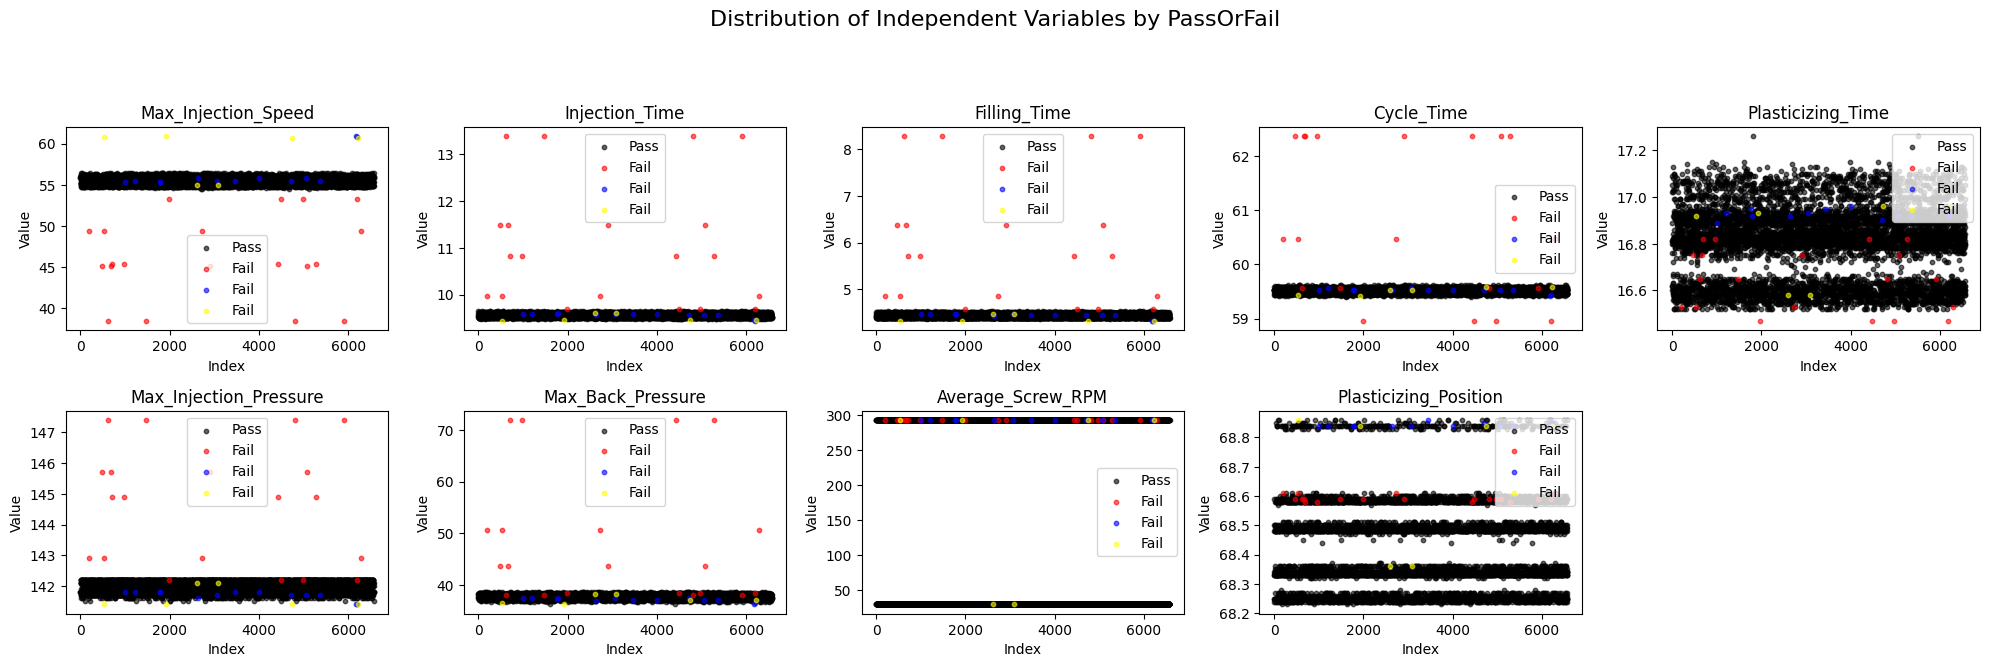

In [40]:
# 회귀계수가 높은 컬럼 이름  + Reason
col_list = ["Max_Injection_Speed", "Injection_Time", "Filling_Time", "Cycle_Time", "Plasticizing_Time" ,"Max_Injection_Pressure",
"Max_Back_Pressure", "Average_Screw_RPM", "Plasticizing_Position", "Reason"]

# 필요한 데이터 프레임 복사
tmp = cn7_2[col_list].copy()
tmp["Reason"].value_counts()

# Reason 시각화를 위해 각각의 
tmp = tmp.replace("초기허용불량", 1).replace("가스", 2).replace("미성형", 3)
tmp = tmp.fillna(0)

# 인덱스 섞기 (불량이 끝에 몰려있어 보기 힘들었음)
tmp = tmp.sample(frac=1, random_state=42).reset_index(drop=True)

# 독립 변수와 종속 변수 분
y = tmp["Reason"]
X = tmp.drop(columns=["Reason"])

# 그래프 설정
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
axes = axes.flatten()
fig.suptitle("Distribution of Independent Variables by PassOrFail", fontsize=16)

# 독립 변수별 산점도 생성
for i, column in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(X.index[y == 0], X[column][y == 0], label="Pass", color="black", alpha=0.6, s=10)
    ax.scatter(X.index[y == 1], X[column][y == 1], label="Fail", color="red", alpha=0.6, s=10)
    ax.scatter(X.index[y == 2], X[column][y == 2], label="Fail", color="blue", alpha=0.6, s=10)
    ax.scatter(X.index[y == 3], X[column][y == 3], label="Fail", color="yellow", alpha=0.6, s=10)
    ax.set_title(column)
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.legend()

# 빈 그래프 제거
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [41]:
import matplotlib.pyplot as plt

# 산점도 생성
plt.figure(figsize=(10, 6))
plt.scatter(tmp2['Plasticizing_Position'][y == 0], tmp2['Max_Injection_Speed'][y == 0], label='Pass', color='black', alpha=0.6, s=50)
plt.scatter(tmp2['Plasticizing_Position'][y == 1], tmp2['Max_Injection_Speed'][y == 1], label='Fail (0)', color='red', alpha=1, s=50)
plt.scatter(tmp2['Plasticizing_Position'][y == 2], tmp2['Max_Injection_Speed'][y == 2], label='Fail (1)', color='blue', alpha=1, s=50)
plt.scatter(tmp2['Plasticizing_Position'][y == 3], tmp2['Max_Injection_Speed'][y == 3], label='Fail (2)', color='yellow', alpha=1, s=50)

# 그래프 설정
plt.title('Plasticizing_Position vs Max_Injection_Speed')
plt.xlabel('Plasticizing_Position')
plt.ylabel('Max_Injection_Speed')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'tmp2' is not defined

<Figure size 1000x600 with 0 Axes>